C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images/*.jpg*
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_760_11.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_760_12.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_760_13.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_760_14.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_760_15.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_770_1.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T211154Z-001/New Pictures 2-10-24/Paper Fire Images\P_770_2.jpg
C:/Users/alvin/Downloads/New Pictures 2-10-24-20240401T2

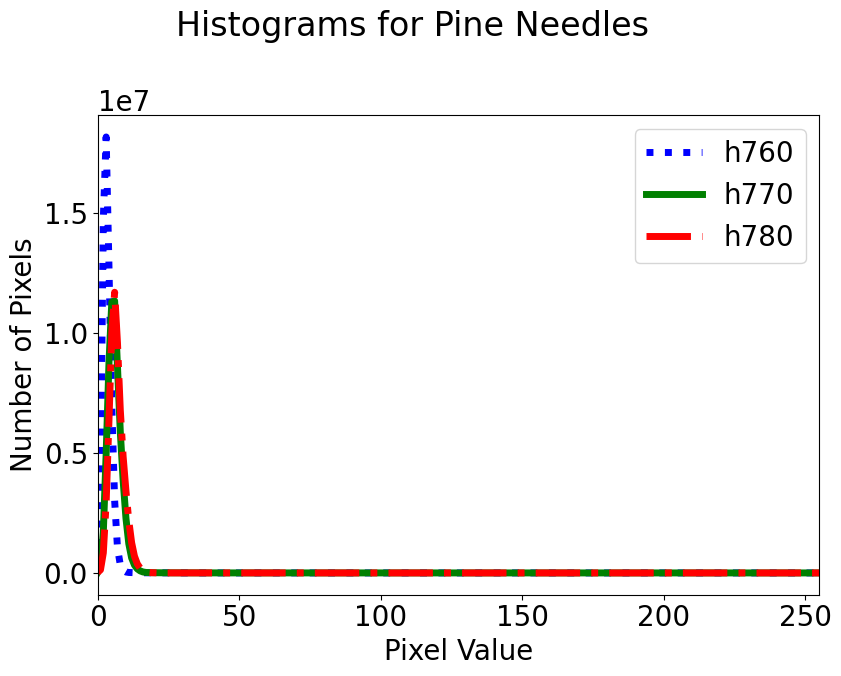

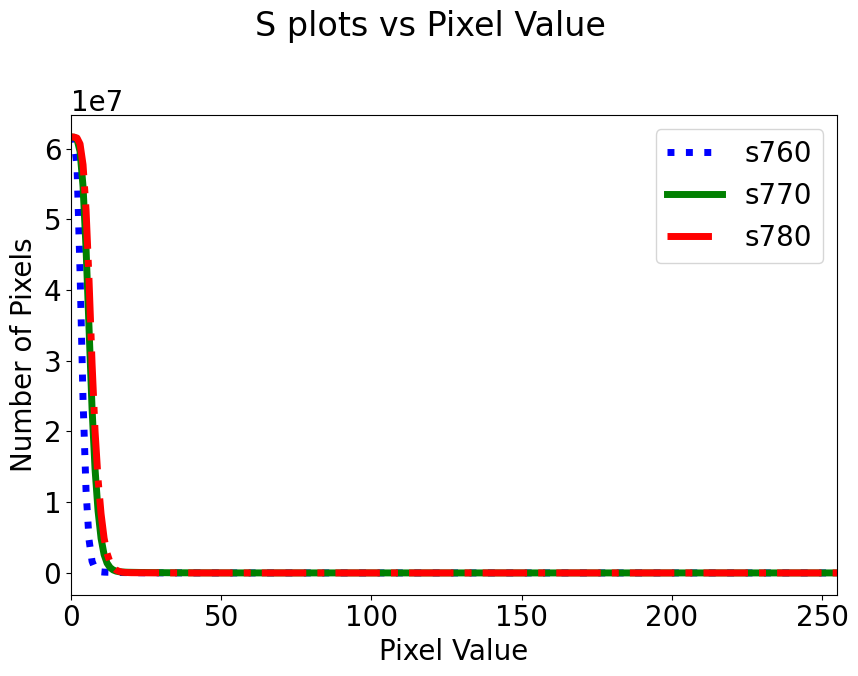

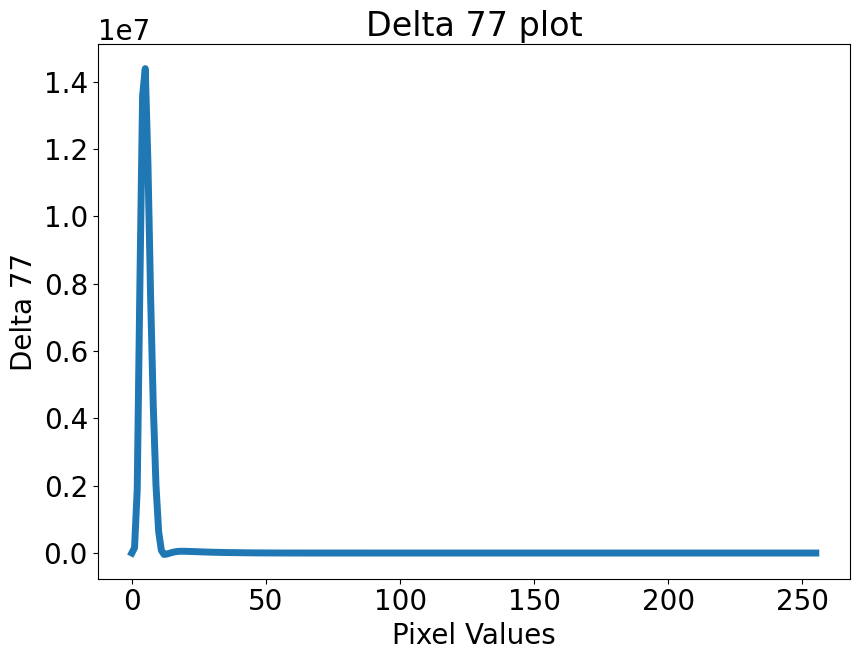

In [20]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2 as poop
import glob
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [9,7]
plt.rcParams['figure.autolayout'] = True
# Changeable file type e.g(.jpg,.png,etc.) must be within **

file_type = "*.jpg*"

# adjustable range of pixel values from 0 to 255

n = 256

# building bin index for histogram

ih = np.zeros(n, np.int32)
for i in range(0, n):
    ih[i] = int(i)

# When run, user input is requested in which the user can copy and paste the file path
# The file is then adjusted into a useable format

for i in range(0, 1):

    path = 'C:\\Users\\alvin\\Downloads\\New Pictures 2-10-24-20240401T211154Z-001\\New Pictures 2-10-24\\Paper Fire Images'
    count = path.count('\\')
    count2 = path.count('"')
    if count != 0:
       new_path = path.replace('\\', '/')
    if count2 != 0:
        new_path = path.replace('"','')
    if path.endswith('/' + file_type):
        break
    elif path.endswith('/'):
        new_path = ''.join([path,file_type])
    else:
        new_path += '/'+ file_type


print(new_path)

# Setting up image and histogram list to organize and process images efficiently

image_list = []
h760_list = []
h770_list = []
h780_list = []

# reading image/images of choice
# In this case I am using an image of pine needles from Feb 10

for file in sorted(glob.glob(new_path)):
    print(file)
    fimages = poop.imread(file, 0)
    image_list.append(fimages)

image_num = len(image_list)

# Calculating histograms for each set of images/filters
# They are then organized into their respective lists and summed up

for i in range(0, image_num):
    h_img = poop.calcHist([image_list[i]], [0], None, [256], [0, 256])
    if i < image_num/3:
        h760_list.append(h_img)
    elif i < (2/3)*image_num:
        h770_list.append(h_img)
    else:
        h780_list.append(h_img)

h760 = sum(np.array(h760_list))
h770 = sum(np.array(h770_list))
h780 = sum(np.array(h780_list))

# Co-plotting for histograms calculated above on linear and logarithmic scales

fig1, ax1 = plt.subplots()
fig1.suptitle('Histograms for Pine Needles')

ax1.plot(h760, color='blue',linestyle='dotted',linewidth='5')
ax1.plot(h770, color='green',linewidth='5')
ax1.plot(h780, color='red',linestyle='dashdot',linewidth='5')
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Number of Pixels')
ax1.legend(['h760', 'h770', 'h780'])
ax1.set_xlim([0,255])
# ax2.plot(h760, color='blue',linestyle='dotted')
# ax2.plot(h770, color='green')
# ax2.plot(h780, color='red',linestyle='dashdot')
# ax2.set_yscale('log')
# ax2.set_xlabel('Pixel Value')
# ax2.set_ylabel('Number of Pixels')
# ax2.legend(['h760', 'h770', 'h780'])

s760_list = []
s770_list = []
s780_list = []
h760, h770, h780 = h760.flatten(), h770.flatten(), h780.flatten()
print(sum(h760))
for i in range(0, 256):
    pix_sum1 = int(sum(h760))
    s760_list.append(pix_sum1)
    h760[i] = 0
    pix_sum2 = int(sum(h770))
    s770_list.append(pix_sum2)
    h770[i] = 0
    pix_sum3 = int(sum(h780))
    s780_list.append(pix_sum3)
    h780[i] = 0


s760 = np.array(s760_list)
s770 = np.array(s770_list)
s780 = np.array(s780_list)
# s760, s770,s780 = [],[],[]
# for i in range(0, 256):
#     s760[i] = (0.96/(3039*4055))*ss760[i]*ih[i]
#     s770[i] = (0.96/(3039*4055))*ss770[i]*ih[i]
#     s780[i] = (0.96/(3039*4055))*ss780[i]*ih[i]


fig2, ax1 = plt.subplots()
fig2.suptitle('S plots vs Pixel Value')

ax1.plot(s760, color='blue',linestyle='dotted',linewidth='5')
ax1.plot(s770, color='green',linewidth='5')
ax1.plot(s780, color='red',linestyle='dashdot',linewidth='5')
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Number of Pixels')
ax1.legend(['s760', 's770', 's780'])
ax1.set_xlim([0,255])
# ax2.plot(s760, color='blue')
# ax2.plot(s770, color='green')
# ax2.plot(s780, color='red')
# ax2.set_yscale('log')
# ax2.set_xlabel('Pixel Value')
# ax2.set_ylabel('Number of Pixels')
# ax2.legend(['s760', 's770', 's780'])


midpoint = (1/2)*(s760 + s780)
delta77 = s770 - midpoint

fig3, ax = plt.subplots()
ax.plot(ih,delta77,linewidth='5')
ax.set_title('Delta 77 plot')
ax.set_xlabel('Pixel Values')
ax.set_ylabel('Delta 77')
# ax.set_ylim([0,0.1e7])
plt.show()
fig_list = [fig1, fig2, fig3]

# Name your report with file format

pdfFile = PdfPages('C:\\Users\\alvin\\OneDrive\\Desktop\\'+ input())

for pltItr in range(0,3):
    pdfFile.savefig(fig_list[pltItr])

pdfFile.close()